In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from tqdm import tqdm
import itertools

from rbm import FineRBM, A1_RBM
from utils.loss import *

In [2]:
device = torch.device('cuda')

# MLRG Step

In [3]:
def step(J, iters=5000, batch_n=4, k=10):
    fine = FineRBM(J, device)
    coarse = A1_RBM(J, device)
    optimizer = torch.optim.Adam(coarse.parameters(), lr=0.001)

    Js = []
    for i in tqdm(range(iters)):
        optimizer.zero_grad()
    
        loss = free_energy_difference(
            fine, coarse, 
            batch_n=batch_n, k=k
        )
        loss.backward()
        optimizer.step()

        Js.append(float(coarse.J))

    return Js

# MLRG Loop

In [4]:
J = 2 # Initial J
steps = []

In [7]:
n_steps = 10

for i in range(n_steps):
    print(f'Step {i}')
    
    Js = step(J, iters=2500, k=24)
    steps.append(Js)
    
    J = Js[-1]

Step 0


100%|██████████████████████████████████████| 2500/2500 [00:13<00:00, 178.86it/s]


Step 1


100%|██████████████████████████████████████| 2500/2500 [00:14<00:00, 177.06it/s]


Step 2


100%|██████████████████████████████████████| 2500/2500 [00:14<00:00, 178.13it/s]


Step 3


100%|██████████████████████████████████████| 2500/2500 [00:13<00:00, 179.30it/s]


Step 4


100%|██████████████████████████████████████| 2500/2500 [00:13<00:00, 179.14it/s]


Step 5


100%|██████████████████████████████████████| 2500/2500 [00:14<00:00, 178.47it/s]


Step 6


100%|██████████████████████████████████████| 2500/2500 [00:13<00:00, 186.67it/s]


Step 7


100%|██████████████████████████████████████| 2500/2500 [00:13<00:00, 190.96it/s]


Step 8


100%|██████████████████████████████████████| 2500/2500 [00:13<00:00, 180.65it/s]


Step 9


100%|██████████████████████████████████████| 2500/2500 [00:13<00:00, 178.88it/s]


Text(0, 0.5, 'J')

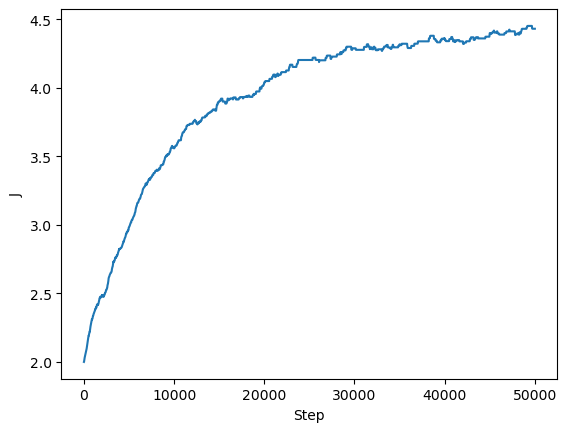

In [8]:
plt.plot(list(
    itertools.chain(*steps)
))
plt.xlabel('Step')
plt.ylabel('J')

# MLRG Gradients

In [ ]:
linspace = list(torch.linspace(0, 2.5, 25).numpy())

deltas = []
for J_t in linspace:
    
    print(f'J={J_t}')
    
    n_steps = 4

    J_s = J_t
    for i in range(n_steps):
        J_s = float(step(J_s)[-1])

    deltas.append(J_s - J_t)

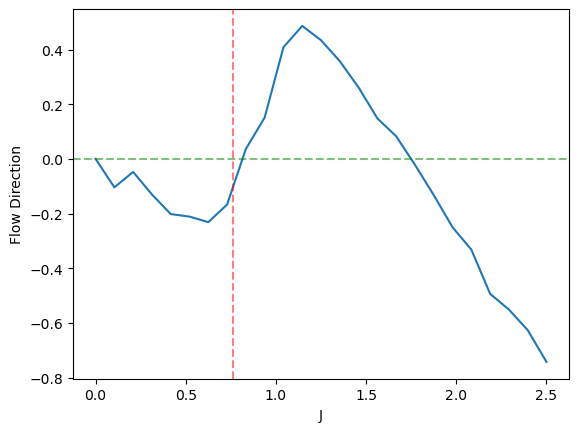

In [36]:
plt.plot(linspace, deltas)
plt.xlabel('J')
plt.ylabel(r'Flow Direction')
plt.axvline(0.7643, ls='--', c='r', alpha=0.5)
plt.axhline(0, ls='--', c='g', alpha=0.5)